<h1><font color="#89C4F" size=6>PRUEBA TÉCNICA</font></h1>

Jorge Mamani Sacsi

jorge.mss19@gmail.com

linkedin.com/in/jorge-noel-mamani-sacsi-81947b1ab


<div style="margin-left: 20px;">
  <font color="#89C4F" size=5>Análisis exploratorio de datos</font><br>
</div>

In [87]:
# importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
# cargar datos
data = pd.read_csv('timeseries_haul_loading_data (1).csv')
df1 = data.copy()
df1.head()

,truck,loader,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full,date
0,CAEX56,PH06,299.682208,3.0,2158.0,315.0,4975.0,5191.0,2023-01-01
1,CAEX64,PH48,316.673117,3.0,1737.0,353.0,5152.0,4960.0,2023-01-01
2,CAEX41,PH06,340.529701,3.0,2210.0,388.0,5042.0,4859.0,2023-01-01
3,CAEX41,PH06,292.835476,3.0,2073.0,260.0,5005.0,4869.0,2023-01-01
4,CAEX71,PH06,337.056639,3.0,2346.0,148.0,5614.0,5289.0,2023-01-01




<div style="margin-left: 20px;">
  <font color="#89C4F" size=5>Información del dataset</font><br>
</div>

In [28]:
# informacion de la data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395680 entries, 0 to 395679
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   truck               395680 non-null  object 
 1   loader              395680 non-null  object 
 2   ton                 395680 non-null  float64
 3   n_shovel            395680 non-null  float64
 4   truck_total_cycle   395680 non-null  float64
 5   loader_total_cycle  395680 non-null  float64
 6   distance_empty      395680 non-null  float64
 7   distance_full       395680 non-null  float64
 8   date                395680 non-null  object 
dtypes: float64(6), object(3)
memory usage: 27.2+ MB


In [ ]:
# Valores faltantes
df1.isnull().sum().sum()

np.int64(0)

In [ ]:
#Valores duplicados
df1.duplicated().sum()

np.int64(0)

In [114]:
# Convertir la columna 'date' a tipo datetime 
df1['date'] = pd.to_datetime(df1['date'])
df1['date'].dtype

dtype('<M8[ns]')

<div style="margin-left: 20px;">
  <font color="#84cff1" size=5>Histograma</font><br>
</div>


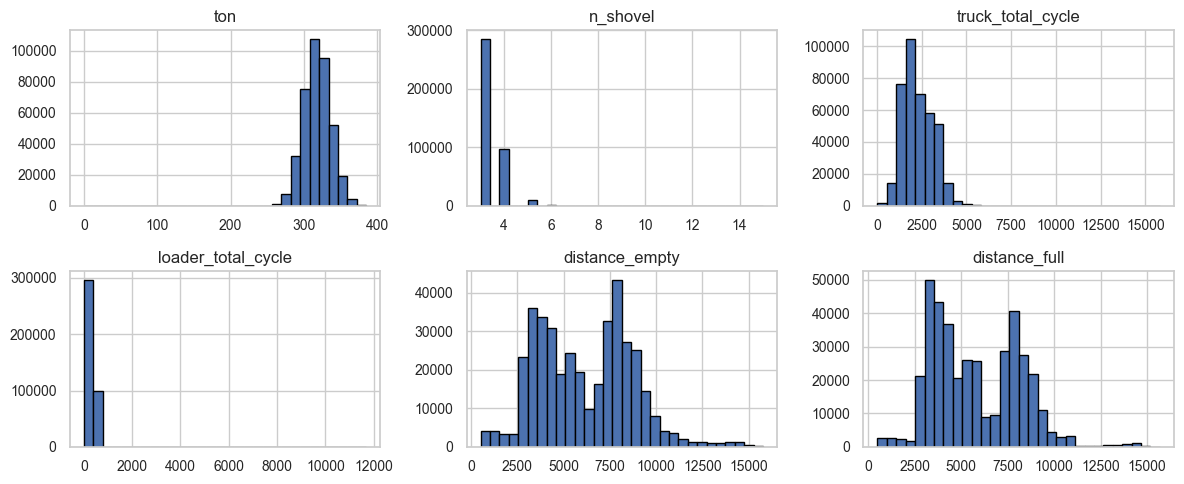

In [ ]:
# Histograma 
fig, axes = plt.subplots(2, 3, figsize=(12,5))  
df1.hist(ax=axes, bins=30, edgecolor='black')

# Ajustar los textos 
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    plt.tight_layout()  

plt.show()


**EL Histograma mostrado nos brinda la siguiente información.**
*   **Tonelaje (ton):**
    Distribución concentrada alrededor de la media de 318 toneladas con una desviación estándar baja, indicando 
    valores cercanos a la media.

*   **Número de Paladas (n_shovel):**
    La mayoría de los valores se agrupan en torno a 3 paladas, con una baja desviación estándar que indica poca
    variabilidad.

*   **Ciclo Total del Camión (truck_total_cycle):**
    Alta variabilidad con una desviación estándar de 856.62 segundos, y un rango que va de 23 a 15,812 segundos, 
    sugiriendo una amplia gama de tiempos de ciclo.

*   **Ciclo Total de la Pala (loader_total_cycle):**
    Distribución con una media de 305.07 segundos y una desviación estándar de 116.66 segundos, mostrando variabilidad 
    moderada.

*   **Distancia Recorrida Vacío (distance_empty) y Distancia Recorrida Lleno (distance_full):**
    Ambas variables muestran alta variabilidad con desviaciones estándar elevadas, indicando una amplia gama de distancias 
    recorridas.

<div style="margin-left: 20px;">
  <font color="#89C4F" size=5>Boxplot</font><br>
</div>


In [ ]:
# blox plot
fig = plt.figure(figsize= (8,8))
ax = fig.gca()
df1.plot(ax=ax, kind='box' ,subplots=True, layout=(3,3))
plt.show()

**Este boxplot nos brinda la siguiente información.**

*   **Tonelaje (ton):**
Pocos valores fuera del rango típico (305.67 a 330.13 toneladas), con posibles outliers cerca del mínimo (0) y máximo (384.93 toneladas).

*   **Número de Paladas (n_shovel):**
La mayoría de los valores están alrededor de 3 paladas, pero se destacan outliers hacia valores más altos (hasta 15 paladas).

*   **Ciclo Total del Camión (truck_total_cycle):**
Alta dispersión con valores típicos entre 1633 y 2945 segundos, pero outliers significativos que llegan hasta 15,812 segundos.

*   **Ciclo Total de la Pala (loader_total_cycle):**
Valores centrales entre 217 y 390 segundos, con algunos outliers cerca del máximo (11,692 segundos).

*   **Distancia Recorrida Vacío (distance_empty) y Distancia Recorrida Lleno (distance_full):**
Gran dispersión con distancias típicas entre 3931 y 8059 metros (vacío) y 3754 y 7798 metros (lleno), con outliers destacados cerca del máximo (hasta 15,783 y 15,691 metros, respectivamente).

<div style="margin-left: 20px;">
  <font color="#89C4F" size=5>Eliminación de ouliers</font><br>
</div>


In [ ]:
# elimacion de outlier

def eliminar_outliers_iqr(df):

    """Elimina los outliers de un DataFrame utilizando el método del rango intercuartílico (IQR).

    Args: df (pd.DataFrame): DataFrame de entrada.

    Returns: pd.DataFrame: Nuevo DataFrame sin los outliers.

    Esta función identifica los outliers en cada columna numérica del DataFrame
    basándose en el rango intercuartílico. Cualquier valor que se encuentre fuera
    de 1.5 veces el IQR por encima del tercer cuartil o por debajo del primer cuartil
    es considerado un outlier y eliminado.
    """

    # Crear una copia del DataFrame para no modificar el original
    df_sin_outliers = df.copy()

    # Iterar sobre cada columna del DataFrame
    for col in df_sin_outliers.columns:
        if df_sin_outliers[col].dtype in ['float64', 'int64']:  # Solo aplicar a columnas numéricas
            # Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
            Q1 = df_sin_outliers[col].quantile(0.25)
            Q3 = df_sin_outliers[col].quantile(0.75)
            IQR = Q3 - Q1  # Rango Intercuartílico

            # Definir los límites inferior y superior para detectar los outliers
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            # Filtrar los valores que no sean outliers
            df_sin_outliers = df_sin_outliers[(df_sin_outliers[col] >= limite_inferior) & (df_sin_outliers[col] <= limite_superior)]

    return df_sin_outliers
    
# Aplicar la función para eliminar outliers
df_sin_outliers = eliminar_outliers_iqr(df1)
df = df_sin_outliers.copy()

print(f"Cantidad de datos con outliers: {df1.shape[0]}")
print(f"Cantidad de datos sin outliers: {df.shape[0]}")


Cantidad de datos con outliers: 395680
Cantidad de datos sin outliers: 385173


<h2><font color="89C4F" size=6>Requerimientos del Análisis </font></h2>

  <font color="#89C4F" size=5>1.	Ranking de Desempeño: </font><br>
</div>


<div style="margin-left: 20px;">  <font color="#15f139" size=4> 1.1. Ranking de Desempeño de las Palas</font><br>



*   **Tonelaje Total Movido por Cada Pala:**

    **Desempeño Superior de la Pala PH58:**

    La pala PH58 ha demostrado un rendimiento sobresaliente, moviendo una cantidad significativamente mayor de tonelaje en comparación con las otras palas. Esto podría ser indicativo de varios factores como una mayor eficiencia operativa, menor tiempo de inactividad, o una mayor asignación de tareas de carga.

    **Desempeño Inferior de la Pala PH55:**

    La pala PH55 ha movido el menor tonelaje. Esto podría sugerir problemas operativos, mayor tiempo de inactividad, menor asignación de tareas, o incluso cuestiones de mantenimiento que impiden su rendimiento óptimo.

In [31]:
# Calcular el tonelaje total por pala
tonelaje_por_pala = df.groupby('loader')['ton'].sum().reset_index()

# Renombrar la columna
tonelaje_por_pala.columns = ['loader', 'tonelaje_total']

# Ordenar las palas por tonelaje total en orden descendente
tonelaje_por_pala = tonelaje_por_pala.sort_values(by='tonelaje_total', ascending=False)
#tonelaje_por_pala['tonelaje_total'] = tonelaje_por_pala['tonelaje_total'].apply(lambda x: f"{x:.2f}")

print(tonelaje_por_pala)


  loader  tonelaje_total
3   PH58    3.867667e+07
1   PH48    3.672576e+07
0   PH06    2.875676e+07
2   PH55    1.829263e+07


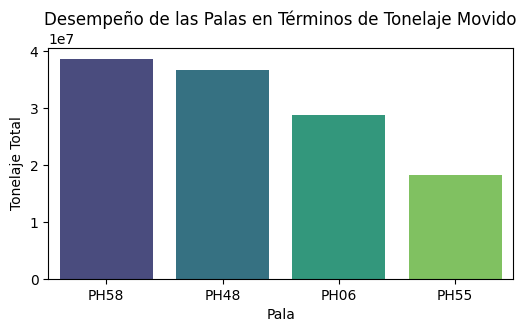

In [ ]:
# Visualización del Desempeño de las Palas

plt.figure(figsize=(6,3))
sns.barplot(data=tonelaje_por_pala, x='loader', y='tonelaje_total', palette='viridis')
plt.title('Desempeño de las Palas en Términos de Tonelaje Movido')
plt.xlabel('Pala')
plt.ylabel('Tonelaje Total')
plt.show()

<div style="margin-left: 20px;">  <font color="#15f139" size=4> 1.2. Ranking de Desempeño de los camiones</font><br>


*   **Tonelaje Total Movido por Cada Camión**

    El camión CAEX66 destaca como el más eficiente con respecto  a la carga de mineral, moviendo la mayor cantidad de tonelaje. Esto sugiere que CAEX66 podría tener una combinación favorable de factores como menor tiempo de inactividad, rutas optimizadas, y posiblemente un operador altamente eficiente.

    Los camiones CAEX55, CAEX25 y CAEX31 también muestran un rendimiento elevado, indicando que estos camiones podrían estar operando en condiciones óptimas y con una asignación adecuada de tareas.


In [13]:
# Calcular el tonelaje total por camión
tonelaje_por_camion = df.groupby('truck')['ton'].sum().reset_index()

# Renombrar la columna para mayor claridad
tonelaje_por_camion.columns = ['truck', 'tonelaje_total']

# Ordenar los camiones por tonelaje total en orden descendente
tonelaje_por_camion = tonelaje_por_camion.sort_values(by='tonelaje_total', ascending=False)

print(tonelaje_por_camion.head(10))


     truck  tonelaje_total
32  CAEX66    5.749801e+06
25  CAEX55    4.739488e+06
10  CAEX25    4.539451e+06
12  CAEX31    4.465499e+06
16  CAEX41    4.434352e+06
46  CAEX98    4.348998e+06
38  CAEX81    4.252616e+06
43  CAEX93    4.116478e+06
18  CAEX44    4.089978e+06
30  CAEX62    2.464682e+06


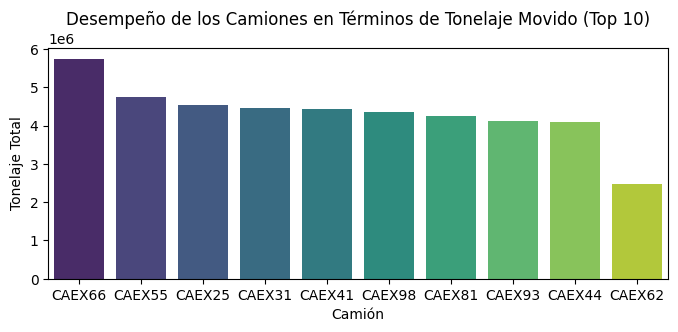

In [ ]:
# Visualización del Desempeño de los Camiones
plt.figure(figsize=(8,3))
sns.barplot(data=tonelaje_por_camion.head(10), x='truck', y='tonelaje_total', palette='viridis')
plt.title('Desempeño de los Camiones en Términos de Tonelaje Movido (Top 10)')
plt.xlabel('Camión')
plt.ylabel('Tonelaje Total')
plt.show()


*  **Calcular la Eficiencia de las Palas:**

    La pala PH58 tiene la eficiencia más alta, aunque por un margen muy pequeño respecto a la PH48 que muestra una eficiencia muy similar. Esto indica que las prácticas operativas y las condiciones en las que opera la PH48 son casi tan buenas como las de la PH58.

    La pala PH06 muestra una eficiencia decente, pero la pala PH55 tiene la eficiencia más baja del grupo, con un valor ligeramente por debajo de 1. Esto podría indicar varios problemas potenciales, como tiempos de ciclo más largos, más tiempo de inactividad, o menos asignación de tareas de carga


  loader  eficiencia
3   PH58    1.078636
1   PH48    1.078028
0   PH06    1.022637
2   PH55    0.988896


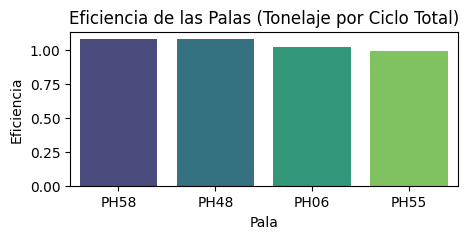

In [32]:
# Calcular la eficiencia de cada pala
eficiencia_pala = df.groupby('loader').apply(lambda x: x['ton'].sum() / x['loader_total_cycle'].sum()).reset_index()
eficiencia_pala.columns = ['loader', 'eficiencia']

# Ordenar las palas por eficiencia en orden descendente
eficiencia_pala = eficiencia_pala.sort_values(by='eficiencia', ascending=False)

print(eficiencia_pala)

plt.figure(figsize=(5,2))
sns.barplot(data=eficiencia_pala, x='loader', y='eficiencia', palette='viridis')
plt.title('Eficiencia de las Palas (Tonelaje por Ciclo Total)')
plt.xlabel('Pala')
plt.ylabel('Eficiencia')
plt.show()


*    **Calcular la Eficiencia del camiones:**

        La media y la mediana están muy cerca (0.140883 y 0.140533 respectivamente), lo que sugiere que la distribución de las eficiencias es bastante simétrica y que no hay muchos valores extremos.

        La desviación estándar baja (0.003917) indica que la mayoría de los camiones tienen eficiencias cercanas al promedio, lo que muestra una consistencia en el rendimiento de la flota.



     truck  eficiencia
29  CAEX61    0.158086
30  CAEX62    0.149699
15  CAEX39    0.146734
2   CAEX08    0.145759
20  CAEX47    0.144727
34  CAEX71    0.143815
16  CAEX41    0.143613
11  CAEX30    0.143443
13  CAEX34    0.143326
23  CAEX52    0.142902
            count      mean       std       min       25%       50%       75%  \
eficiencia   47.0  0.140883  0.003917  0.134381  0.139177  0.140533  0.141798   

                 max  
eficiencia  0.158086  


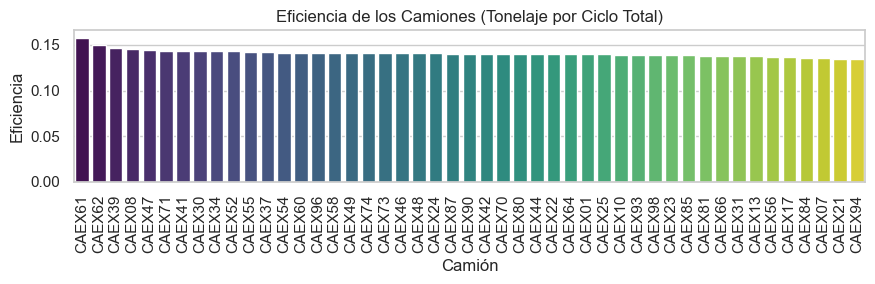

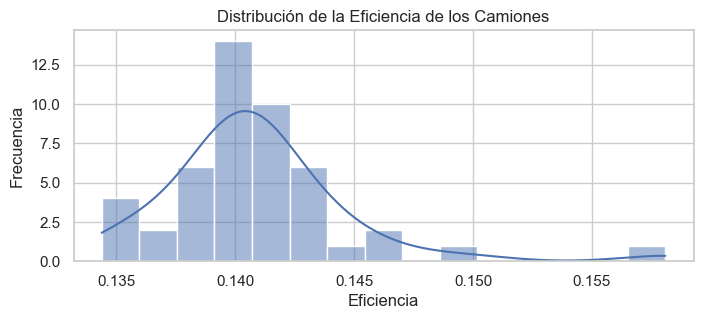

In [75]:
# Calcular la eficiencia de cada camión
eficiencia_camion = df.groupby('truck').apply(lambda x: x['ton'].sum() / x['truck_total_cycle'].sum()).reset_index()
eficiencia_camion.columns = ['truck', 'eficiencia']

# Ordenar los camiones por eficiencia en orden descendente
eficiencia_camion = eficiencia_camion.sort_values(by='eficiencia', ascending=False)

print(eficiencia_camion.head(10))

# Estadísticas descriptivas de la eficiencia
estadisticas_descriptivas = pd.DataFrame(eficiencia_camion['eficiencia'].describe()).T

print(estadisticas_descriptivas)

plt.figure(figsize=(9,3))
sns.barplot(data=eficiencia_camion, x='truck', y='eficiencia', palette='viridis')
plt.title('Eficiencia de los Camiones (Tonelaje por Ciclo Total)')
plt.xlabel('Camión')
plt.ylabel('Eficiencia')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(8, 3))
sns.histplot(eficiencia_camion['eficiencia'], bins=15, kde=True)
plt.title('Distribución de la Eficiencia de los Camiones')
plt.xlabel('Eficiencia')
plt.ylabel('Frecuencia')
plt.show()



En el histograma de la eficiencia de los camiones, indica que en promedio, los camiones operan con una eficiencia bastante constante y cercana a al valor 0.14. Pero, la cola extendida hacia la derecha significa que hay algunos camiones con eficiencias significativamente más altas que la media. Estos camiones son excepcionales en su rendimiento y están operando de manera más eficiente que la mayoría. Esto lo podemos relacionar con los 9 Camiones que tienen un buen desempeño con respecto al tonelaje total cargado que vimos anteriormente.
        


  <font color="#89C4F" size=5>2.	Identificación de factores criticos: </font><br>
</div>


*   **Analisis de correlación:**

    **A partir de los resultados del análisis de correlación, podemos extraer varias conclusiones clave:**

    Distancia Vacío (distance_empty) y Distancia Lleno (distance_full):Hay una correlación positiva muy alta (0.607966) entre estas dos variables, lo que sugiere que los camiones que recorren grandes distancias vacíos también recorren grandes distancias

    Ciclo Total del Camión (truck_total_cycle) y Distancia Recorrida Lleno (distance_full): La correlación es alta (0.763282), lo que indica que un mayor tiempo de ciclo total del camión está fuertemente relacionado con mayores distancias recorridas llenos.

    Ciclo Total del Camión (truck_total_cycle) y Distancia Recorrida Vacío (distance_empty):Hay una correlación moderada (0.604587), indicando que el tiempo de ciclo del camión también se ve afectado significativamente por la distancia recorrida vacío.




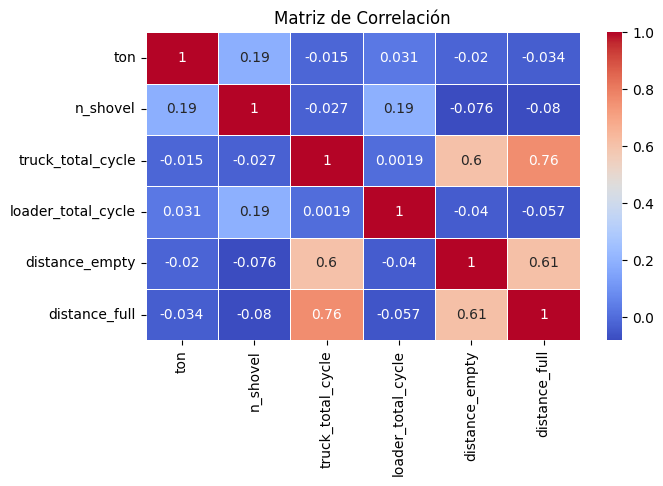

In [45]:

# Seleccionar las variables numéricas relevantes
variables_interes = df[['ton', 'n_shovel', 'truck_total_cycle', 'loader_total_cycle', 'distance_empty', 'distance_full']]

# Calcular la matriz de correlación
correlation_matrix = variables_interes.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(7,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


**Factores Críticos Identificados:**

**Distancias Recorridas (Vacío y Lleno):**

Las distancias recorridas vacías y llenas son factores críticos que influyen significativamente en el tiempo de ciclo total del camión. Optimizar estas distancias puede mejorar la eficiencia operativa de los camiones.

**Tiempo de Ciclo Total del Camión (truck_total_cycle):**

Está fuertemente influenciado por las distancias recorridas. Reducir las distancias recorridas, especialmente vacío, puede mejorar el tiempo de ciclo y, por ende, la eficiencia

* **Random Forest para Importancia de Características**

In [ ]:
# Definir la variable objetivo y las variables predictoras
X = df[['n_shovel', 'truck_total_cycle', 'loader_total_cycle', 'distance_empty', 'distance_full']]
y = df['ton']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de las características (tanto entrenamiento como prueba)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Importante: usamos transform en el conjunto de prueba

MSE: 313.67864311231983


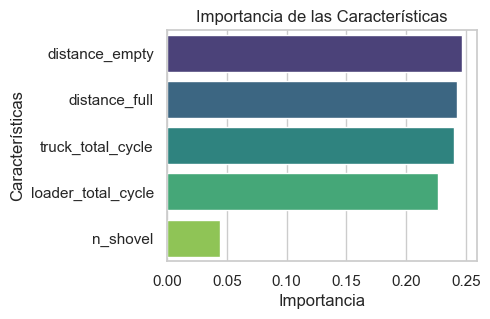

In [108]:
# Definir el modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=7)

# Ajustar el modelo
model_rf.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model_rf.predict(X_test_scaled)  # Usamos el conjunto de prueba escalado

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Importancia de las características
importancia_caracteristicas = model_rf.feature_importances_

# Crear un DataFrame para mostrar la importancia
features = X.columns
importancia_df = pd.DataFrame({'Características': features, 'Importancia': importancia_caracteristicas})

# Ordenar por importancia
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las características   
plt.figure(figsize=(4,3))
sns.barplot(x='Importancia', y='Características', data=importancia_df, palette='viridis')
plt.title('Importancia de las Características')
plt.show()

Random Forest indicó que los ciclos (ciclo total del camión y ciclo total de la pala) y las distancias (distancia recorrida vacío y lleno) son las características más relevantes para predecir el tonelaje movido.

*   **Feature importan con GXBoost**

MSE: 298.6909263794876


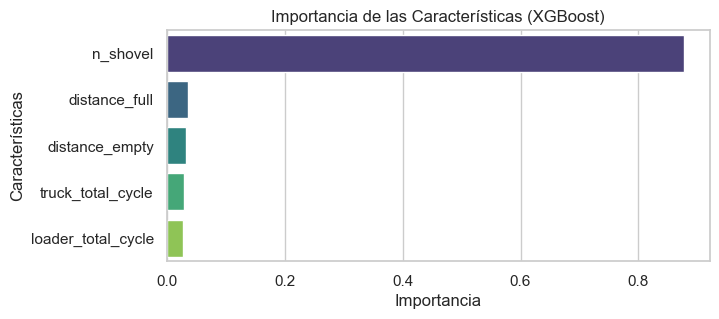

In [95]:
# XGBoost
model_xgb = XGBRegressor(n_estimators=100, random_state=7)

# Ajustar el modelo
model_xgb.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model_xgb.predict(X_test_scaled)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Importancia de las características
importancia_caracteristicas = model_xgb.feature_importances_

# Crear un DataFrame para mostrar la importancia
features = X.columns
importancia_df = pd.DataFrame({'Características': features, 'Importancia': importancia_caracteristicas})

# Ordenar por importancia
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las características   

plt.figure(figsize=(7,3))
sns.barplot(x='Importancia', y='Características', data=importancia_df,palette='viridis')
plt.title('Importancia de las Características (XGBoost)')
plt.show()

XGBoost indicó que el número de paladas (n_shovel) es la característica más relevante, seguido de otras variables.

*   **Conclusiones con respecto a las mejores caracteristicas**

    **Acción Sugerida:**

    **Optimizar el Número de Paladas:** Dado que XGBoost destacó n_shovel como muy relevante, se deberían realizar esfuerzos para optimizar este factor.

    **Mejorar Ciclos y Distancias:** Basado en Random Forest, se debe prestar atención a la mejora de los ciclos de camión y pala, así como la optimización de las distancias recorridas para incrementar el rendimiento. Esto también se refleja en el analisis de correlación.

  <font color="#89C4F" size=5>4.	Analisis adicionales: </font><br>
</div>


*   **Identificación de Patrones de Uso de las Palas:** 

    Podemos crear un análisis para ver cuántas veces cada pala se utilizó diariamente y en cuántos días estuvo inactiva.



In [ ]:
# Convertir la columna de fecha a tipo datetime en el DataFrame original
df['date'] = pd.to_datetime(df['date'])

# Crear una columna de fecha sin tiempo en el DataFrame original
df['fecha'] = df['date'].dt.date  # Extraer solo la fecha sin tiempo
df['fecha'] = pd.to_datetime(df['fecha'])  # Convertir a tipo datetime sin tiempo

# Convertir 'fecha' en uso_diario a tipo datetime para que coincida en el merge
uso_diario = df.groupby(['loader', 'fecha']).size().reset_index(name='conteo')
uso_diario['fecha'] = pd.to_datetime(uso_diario['fecha'])

# Crear un DataFrame de fechas y palas
fechas = pd.date_range(start=df['fecha'].min(), end=df['fecha'].max())
palas = df['loader'].unique()
multi_index = pd.MultiIndex.from_product([palas, fechas], names=['loader', 'fecha'])
df_completo = pd.DataFrame(index=multi_index).reset_index()

# Asegurarnos de que 'fecha' en df_completo también sea de tipo datetime
df_completo['fecha'] = pd.to_datetime(df_completo['fecha'])

# Unir el DataFrame de uso diario con el DataFrame completo
analisis_uso = pd.merge(df_completo, uso_diario, on=['loader', 'fecha'], how='left').fillna(0)

# Contar los días activos e inactivos por pala
resumen_uso = analisis_uso.groupby('loader')['conteo'].agg(
    total_dias='count',
    dias_activos=lambda x: (x > 0).sum(),
    dias_inactivos=lambda x: (x == 0).sum()
).reset_index()

print(resumen_uso)


  loader  total_dias  dias_activos  dias_inactivos
0   PH06         510           443              67
1   PH48         510           477              33
2   PH55         510           356             154
3   PH58         510           478              32


'ver el uso porcentaje de uso de las paladas'

**Alta Actividad de las Palas PH48 y PH58:**

Las palas PH48 y PH58 tienen el mayor número de días activos (477 y 478 días respectivamente) y muy pocos días inactivos. Esto indica que estas palas están siendo utilizadas de manera muy eficiente y consistentemente. La alta disponibilidad operativa sugiere que estas palas tienen un buen mantenimiento y una planificación operativa efectiva.

**Baja Utilización de la Pala PH55:**

La pala PH55, por otro lado, muestra un alto número de días inactivos (154 días) y solo 356 días activos. Este es el desempeño más bajo entre las cuatro palas y sugiere problemas significativos que están limitando su disponibilidad. Esto puede ser debido a fallas mecánicas, problemas de mantenimiento, o una subutilización debido a una mala planificación de tareas.

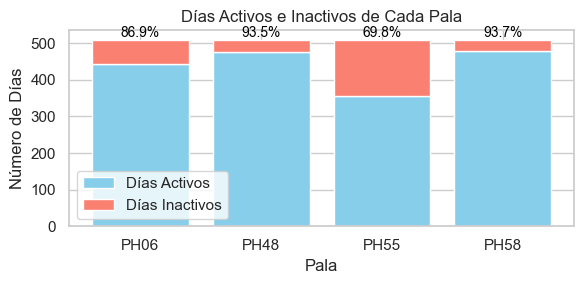

In [ ]:
# Visualización de los dias activos e inactivos de la Pala

# Calcular el porcentaje de días activos
resumen_uso['porcentaje_activo'] = (resumen_uso['dias_activos'] / resumen_uso['total_dias']) * 100

# Configuración del estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(6,3))
# Gráfico de barras apiladas
plt.bar(resumen_uso['loader'], resumen_uso['dias_activos'], label='Días Activos', color='skyblue')
plt.bar(resumen_uso['loader'], resumen_uso['dias_inactivos'], bottom=resumen_uso['dias_activos'], label='Días Inactivos', color='salmon')

# Añadir el porcentaje de días activos en la parte superior de cada barra
for index, row in resumen_uso.iterrows():
    plt.text(row['loader'], row['total_dias'], f"{row['porcentaje_activo']:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Etiquetas y leyenda
plt.xlabel('Pala')
plt.ylabel('Número de Días')
plt.title('Días Activos e Inactivos de Cada Pala')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


*   **Análisis de Distancias Recorridas en los camiones**

In [68]:
# Calcular la distancia total recorrida por cada camión
distancias = df.groupby('truck')[['distance_empty', 'distance_full']].sum().reset_index()

# Calcular la distancia total y la proporción de distancia recorrida vacío vs lleno
distancias['distancia_total'] = distancias['distance_empty'] + distancias['distance_full']
distancias['proporcion_vacio'] = distancias['distance_empty'] / distancias['distancia_total']

print(distancias.sort_values(by='distancia_total', ascending=False).head(10))  # Los 10 camiones que más recorren

     truck  distance_empty  distance_full  distancia_total  proporcion_vacio
32  CAEX66     113983940.0    106134219.0      220118159.0          0.517831
25  CAEX55      90076947.0     84702943.0      174779890.0          0.515374
10  CAEX25      87361023.0     82159370.0      169520393.0          0.515342
12  CAEX31      86445459.0     81728010.0      168173469.0          0.514026
46  CAEX98      83181101.0     77744985.0      160926086.0          0.516890
16  CAEX41      82725394.0     77715244.0      160440638.0          0.515614
38  CAEX81      82510326.0     77647634.0      160157960.0          0.515181
43  CAEX93      79356637.0     74216529.0      153573166.0          0.516735
18  CAEX44      78779931.0     73536881.0      152316812.0          0.517211
11  CAEX30      47100178.0     44612986.0       91713164.0          0.513560


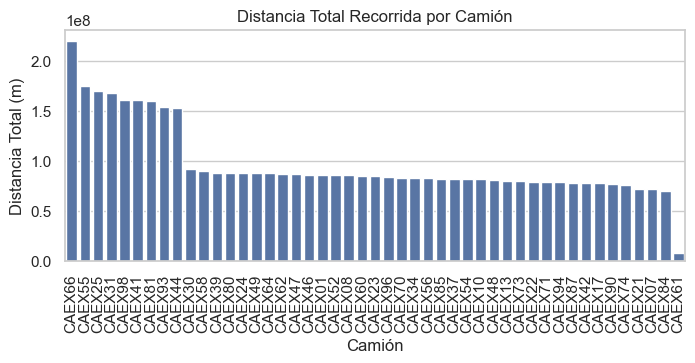

In [69]:
# Gráfico de barras de la distancia total recorrida por camión
plt.figure(figsize=(8,3))
sns.barplot(x='truck', y='distancia_total', data=distancias.sort_values(by='distancia_total', ascending=False))
plt.title('Distancia Total Recorrida por Camión')
plt.xlabel('Camión')
plt.ylabel('Distancia Total (m)')
plt.xticks(rotation=90)
plt.show()

* CAEX66: El camión con la mayor distancia recorrida, lo que indica un alto nivel de utilización.

* 8 Camiones con Buen Desempeño: Estos camiones están justo debajo de CAEX66 en términos de distancia recorrida, indicando un rendimiento consistente y eficiente.

* Camiones con Rendimiento Promedio: La mayoría de los camiones caen en esta categoría, con distancias recorridas alrededor del promedio.

* CAEX61: El camión con la distancia recorrida más baja, significativamente por debajo del promedio.La mínima distancia recorrida por CAEX61 sugiere varios posibles problemas, como fallas mecánicas frecuentes, falta de disponibilidad de operadores, o una mala asignación de tareas.

*   **Identificación de Patrones de Uso de los camiones**

In [70]:
# Asegurarnos de que la columna 'date' en df sea de tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Contar el número de registros por camión por día, asegurando que 'date' se mantenga en formato datetime64[ns]
uso_camion_diario = df.groupby(['truck', df['date'].dt.normalize()]).size().reset_index(name='conteo')

# Convertir 'date' en uso_camion_diario a tipo datetime explícitamente
uso_camion_diario['date'] = pd.to_datetime(uso_camion_diario['date'])

# Crear un DataFrame de fechas y camiones
fechas = pd.date_range(start=df['date'].min(), end=df['date'].max())
camiones = df['truck'].unique()
multi_index = pd.MultiIndex.from_product([camiones, fechas], names=['truck', 'date'])
df_completo = pd.DataFrame(index=multi_index).reset_index()

# Asegurarnos de que 'date' en df_completo también sea de tipo datetime
df_completo['date'] = pd.to_datetime(df_completo['date'])

# Unir el DataFrame de uso diario con el DataFrame completo
analisis_uso_camion = pd.merge(df_completo, uso_camion_diario, on=['truck', 'date'], how='left').fillna(0)

# Contar los días activos e inactivos por camión
resumen_uso_camion = analisis_uso_camion.groupby('truck')['conteo'].agg(
    total_dias='count', 
    dias_activos=lambda x: (x > 0).sum(), 
    dias_inactivos=lambda x: (x == 0).sum()
).reset_index()

# Ordenar y mostrar los 10 camiones con más días inactivos
print(resumen_uso_camion.sort_values(by='dias_inactivos', ascending=False).head(10))

# Calcular estadísticas descriptivas
estadisticas_descriptivas = resumen_uso_camion[['dias_activos', 'dias_inactivos']].describe().T

print(estadisticas_descriptivas)



     truck  total_dias  dias_activos  dias_inactivos
29  CAEX61         510            75             435
6   CAEX21         510           391             119
39  CAEX84         510           400             110
1   CAEX07         510           424              86
36  CAEX74         510           446              64
17  CAEX42         510           454              56
42  CAEX90         510           454              56
35  CAEX73         510           457              53
34  CAEX71         510           464              46
44  CAEX94         510           465              45
                count        mean        std   min    25%    50%    75%    max
dias_activos     47.0  467.446809  63.470229  75.0  468.0  479.0  485.0  509.0
dias_inactivos   47.0   42.553191  63.470229   1.0   25.0   31.0   42.0  435.0


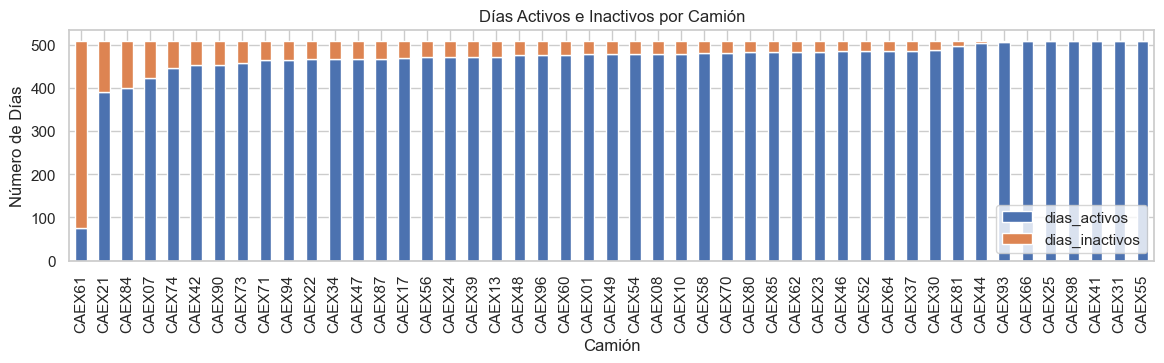

In [66]:
# Gráfico de barras de los días activos e inactivos por camión
resumen_uso_camion.sort_values(by='dias_inactivos', ascending=False).set_index('truck')\
    [['dias_activos', 'dias_inactivos']].plot(kind='bar', stacked=True, figsize=(14, 3))
plt.title('Días Activos e Inactivos por Camión')
plt.xlabel('Camión')
plt.ylabel('Número de Días')
plt.xticks(rotation=90)
plt.show()

**Distribución de los Días Activos:**

La mayoría de los camiones están activos la mayor parte del tiempo, con un promedio de 467.45 días activos y una mediana de 479 días. Esto muestra una buena disponibilidad operativa general. Sin embargo, la desviación estándar de 63.47 días indica que hay variabilidad en la utilización entre los camiones.

**Distribución de los Días Inactivos:**

Aunque el promedio de días inactivos es relativamente bajo (42.55 días), la alta desviación estándar sugiere una gran variabilidad en la inactividad entre los camiones. El hecho de que algunos camiones tengan hasta 435 días inactivos es un signo de problemas significativos que necesitan ser abordados.

**Camiones con Baja Utilización:**

Los camiones con un alto número de días inactivos (hasta 435 días) representan una oportunidad clara para mejorar. Es crucial identificar las causas de esta baja utilización, ya que podría ser debido a problemas mecánicos, falta de operadores, o una planificación subóptima.

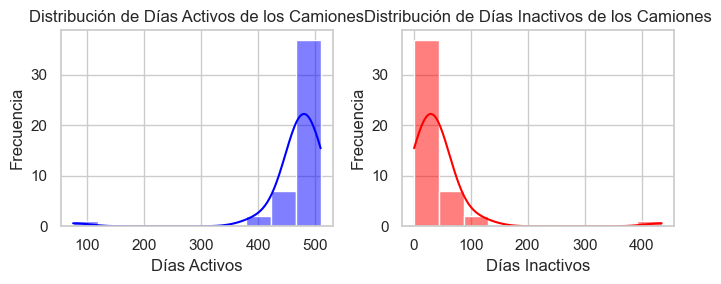

In [ ]:
# Histograma de días activos

plt.figure(figsize=(7,3))
plt.subplot(1, 2, 1)
sns.histplot(resumen_uso_camion['dias_activos'], bins=10, kde=True, color='blue')
plt.title('Distribución de Días Activos de los Camiones')
plt.xlabel('Días Activos')
plt.ylabel('Frecuencia')

# Histograma de días inactivos
plt.subplot(1, 2, 2)
sns.histplot(resumen_uso_camion['dias_inactivos'], bins=10, kde=True, color='red')
plt.title('Distribución de Días Inactivos de los Camiones')
plt.xlabel('Días Inactivos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()




  <font color="#89C4F" size=5>4. Recomendaciones: </font><br>
</div>


**1.	Optimización de Palas**

**Pala PH55:** Realizar un mantenimiento preventivo más riguroso y revisar las fallas mecánicas recurrentes para reducir los 154 días inactivos. 
**Replicar las buenas prácticas operativas de las palas PH48 y PH58**, que tienen solo 33 y 32 días inactivos respectivamente, en todas las palas.

**2.	Mejora de Camiones**

**CAEX61:** Realizar una revisión exhaustiva del mantenimiento y planificación de rutas para reducir sus 435 días inactivos. Proporcionar capacitación adicional a los operadores y balancear la carga de trabajo.
**Optimizar rutas y utilizar tecnologías de gestión de flotas** para reducir el tiempo de inactividad, basado en el buen desempeño de camiones como CAEX66.

**3.	 Monitoreo y Análisis Continuo**

**Implementar Monitoreo en Tiempo Real:** Utilizar sensores y sistemas de diagnóstico avanzados para prever problemas y tomar medidas correctivas inmediatas. Esto se aplica tanto a las palas como a los camiones.
**Análisis Predictivo:** Utilizar análisis predictivo para anticipar problemas y planificar el mantenimiento de manera proactiva.
**Capacitación de los operadores**. Realizar capacitaciones constantes y replicar las buenas prácticas de aquellos quienes obtuvieron un buen desempeño.

**Alcance de las Recomendaciones**

Al implementar estas acciones, se espera mejorar significativamente el rendimiento operativo y maximizar la eficiencia en el próximo año
